In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame, Series
import re
from pathlib import Path
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
from matplotlib import pyplot as plt

In [84]:
file = Path('Resources/Jan_2020_ontime.csv')
df = pd.read_csv(file) 

In [85]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN


In [86]:
# Review columns in data
df.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'Unnamed: 21'],
      dtype='object')

In [87]:
# Check data types
df.dtypes

DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
OP_UNIQUE_CARRIER         object
OP_CARRIER_AIRLINE_ID      int64
OP_CARRIER                object
TAIL_NUM                  object
OP_CARRIER_FL_NUM          int64
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN                    object
DEST_AIRPORT_ID            int64
DEST_AIRPORT_SEQ_ID        int64
DEST                      object
DEP_TIME                 float64
DEP_DEL15                float64
DEP_TIME_BLK              object
ARR_TIME                 float64
ARR_DEL15                float64
CANCELLED                float64
DIVERTED                 float64
DISTANCE                 float64
Unnamed: 21              float64
dtype: object

In [88]:
# Review unique carrier names to identify what will be excluded
df.OP_UNIQUE_CARRIER.unique()

array(['EV', 'WN', 'MQ', 'B6', 'HA', 'AA', 'F9', 'YX', '9E', 'YV', 'OH',
       'NK', 'DL', 'OO', 'UA', 'G4', 'AS'], dtype=object)

In [89]:
columns_to_drop = ['CANCELLED','DIVERTED','OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','DEP_TIME_BLK', 'ARR_TIME','TAIL_NUM','DEP_DEL15','ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_SEQ_ID','DISTANCE','Unnamed: 21']
df_clean = df.drop(columns=columns_to_drop)
df_clean = df_clean.set_index('OP_CARRIER_FL_NUM')
print(df_clean.head())

                   DAY_OF_MONTH  DAY_OF_WEEK OP_CARRIER ORIGIN DEST  DEP_TIME  \
OP_CARRIER_FL_NUM                                                               
4397                          1            3         EV    ORD  GRB    1003.0   
4401                          1            3         EV    TUL  ORD    1027.0   
4404                          1            3         EV    EWR  TYS    1848.0   
4405                          1            3         EV    BTR  IAH    1846.0   
4407                          1            3         EV    RIC  IAH    1038.0   

                   ARR_DEL15  
OP_CARRIER_FL_NUM             
4397                     0.0  
4401                     0.0  
4404                     0.0  
4405                     0.0  
4407                     0.0  


In [90]:
for column in df_clean.columns:
    print(f'Column {column} has {df_clean[column].isnull().sum()}null values')

Column DAY_OF_MONTH has 0null values
Column DAY_OF_WEEK has 0null values
Column OP_CARRIER has 0null values
Column ORIGIN has 0null values
Column DEST has 0null values
Column DEP_TIME has 6664null values
Column ARR_DEL15 has 8078null values


In [91]:
df_cleaned = df_clean.dropna()
print(df_cleaned)

                   DAY_OF_MONTH  DAY_OF_WEEK OP_CARRIER ORIGIN DEST  DEP_TIME  \
OP_CARRIER_FL_NUM                                                               
4397                          1            3         EV    ORD  GRB    1003.0   
4401                          1            3         EV    TUL  ORD    1027.0   
4404                          1            3         EV    EWR  TYS    1848.0   
4405                          1            3         EV    BTR  IAH    1846.0   
4407                          1            3         EV    RIC  IAH    1038.0   
...                         ...          ...        ...    ...  ...       ...   
4812                         31            5         9E    TYS  DTW    1002.0   
4813                         31            5         9E    DTW  JFK    1747.0   
4814                         31            5         9E    GSP  LGA     554.0   
4815                         31            5         9E    ATL  XNA    1714.0   
4815                        

In [92]:
# List of airline codes to keep
OP_CARRIER = ['AA', 'NK', 'DL', 'UA', 'WN']
filter_df = df_cleaned[df_cleaned['OP_CARRIER'].isin(OP_CARRIER)]
filter_df = filter_df.dropna()
print(filter_df)

                   DAY_OF_MONTH  DAY_OF_WEEK OP_CARRIER ORIGIN DEST  DEP_TIME  \
OP_CARRIER_FL_NUM                                                               
5198                          1            3         WN    ABQ  AUS    1200.0   
1493                          1            3         WN    ABQ  BWI     852.0   
4139                          1            3         WN    ABQ  DAL    1111.0   
4514                          1            3         WN    ABQ  DAL    1354.0   
4881                          1            3         WN    ABQ  DAL     721.0   
...                         ...          ...        ...    ...  ...       ...   
3122                         31            5         DL    ATL  BHM    2250.0   
3124                         31            5         DL    PHX  SLC     645.0   
3125                         31            5         DL    ELP  ATL     820.0   
3130                         31            5         DL    ATL  CLE    1216.0   
3130                        

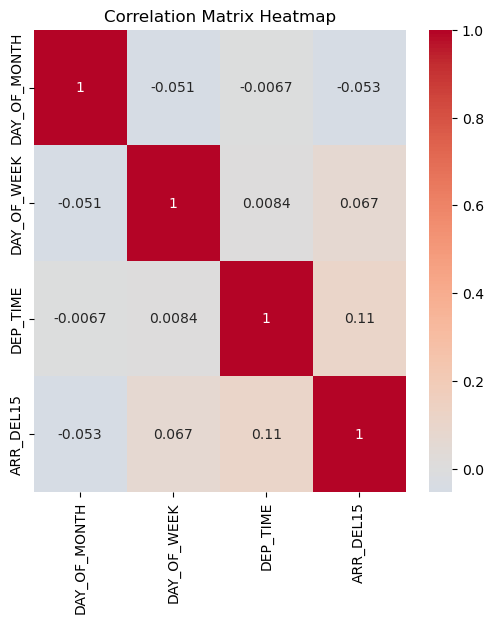

In [93]:
corr_matrix = filter_df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


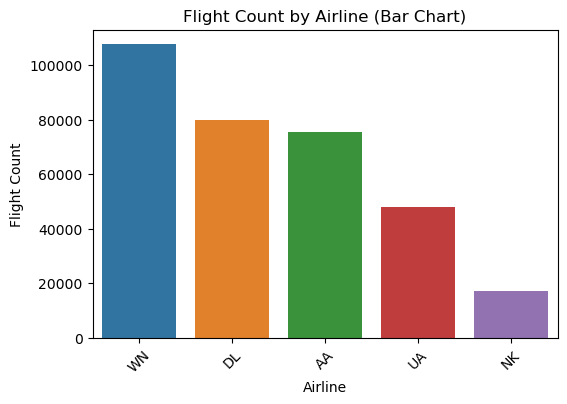

In [94]:
# Flight Delays by Airline 
# Calculate the count of flights for each airline
carrier_counts = filter_df['OP_CARRIER'].value_counts()

# Create the bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=carrier_counts.index, y=carrier_counts.values)
plt.title('Flight Count by Airline (Bar Chart)')
plt.xlabel('Airline')
plt.ylabel('Flight Count')
plt.xticks(rotation=45)  
plt.show()


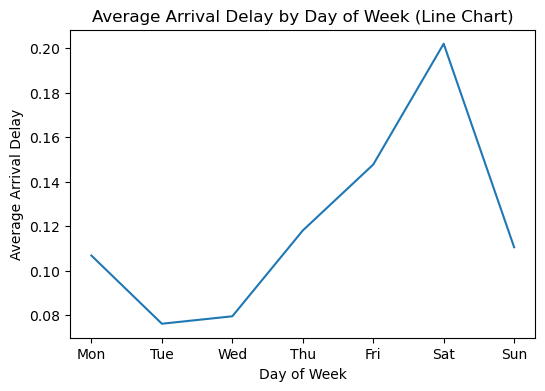

In [95]:
# Flight Delays by Day of Week
# Calculate the mean arrival delay for each day of the week
mean_delay_by_day = filter_df.groupby('DAY_OF_WEEK')['ARR_DEL15'].mean()

# Create the line chart
plt.figure(figsize=(6, 4))
sns.lineplot(x=mean_delay_by_day.index, y=mean_delay_by_day.values)
plt.title('Average Arrival Delay by Day of Week (Line Chart)')
plt.xlabel('Day of Week')
plt.ylabel('Average Arrival Delay')
plt.xticks(mean_delay_by_day.index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  
plt.show()


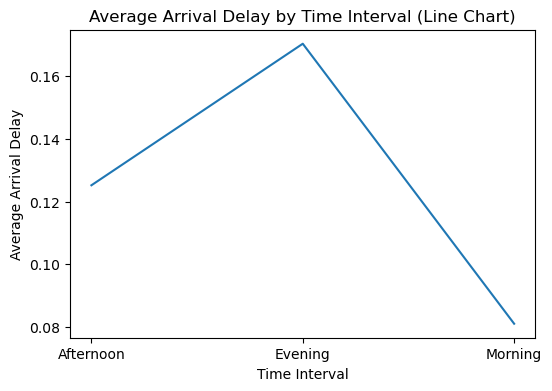

In [96]:
# Flight delays during the time of the day
# Categorize time intervals
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# create a new column
filter_df['TimeCategory'] = filter_df['DEP_TIME'].apply(lambda x: categorize_time(x // 100))

# Calculate the mean arrival delay 
mean_delay_by_time = filter_df.groupby('TimeCategory')['ARR_DEL15'].mean()

# Create the line chart
plt.figure(figsize=(6, 4))
sns.lineplot(x=mean_delay_by_time.index, y=mean_delay_by_time.values)
plt.title('Average Arrival Delay by Time Interval (Line Chart)')
plt.xlabel('Time Interval')
plt.ylabel('Average Arrival Delay')
plt.show()


In [97]:
# Liner regression 
# R-squared is used to measure the variance in the dependent variable that's predictable from the independent variables. It didn't provide a good evaluation for binary classification tasks.
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

y = filter_df['ARR_DEL15']
data = filter_df.drop(['ARR_DEL15'], axis=1)
X = filter_df.select_dtypes(include=['int', 'float']).values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model 
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 1.0


In [98]:
# Random Forest
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(filter_df)
dummies

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,ARR_DEL15,OP_CARRIER_AA,OP_CARRIER_DL,OP_CARRIER_NK,OP_CARRIER_UA,OP_CARRIER_WN,ORIGIN_ABE,...,DEST_TRI,DEST_TUL,DEST_TUS,DEST_TVC,DEST_TYS,DEST_VPS,DEST_XNA,TimeCategory_Afternoon,TimeCategory_Evening,TimeCategory_Morning
OP_CARRIER_FL_NUM,,,,,,,,,,,,,,,,,,,,,
5198,1,3,1200.0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1493,1,3,852.0,1.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4139,1,3,1111.0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4514,1,3,1354.0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4881,1,3,721.0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122,31,5,2250.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3124,31,5,645.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3125,31,5,820.0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [99]:
dummies.dropna()

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,ARR_DEL15,OP_CARRIER_AA,OP_CARRIER_DL,OP_CARRIER_NK,OP_CARRIER_UA,OP_CARRIER_WN,ORIGIN_ABE,...,DEST_TRI,DEST_TUL,DEST_TUS,DEST_TVC,DEST_TYS,DEST_VPS,DEST_XNA,TimeCategory_Afternoon,TimeCategory_Evening,TimeCategory_Morning
OP_CARRIER_FL_NUM,,,,,,,,,,,,,,,,,,,,,
5198,1,3,1200.0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1493,1,3,852.0,1.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4139,1,3,1111.0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4514,1,3,1354.0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4881,1,3,721.0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122,31,5,2250.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3124,31,5,645.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3125,31,5,820.0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [100]:
# Define features set
X = dummies.copy()
X.drop('ARR_DEL15', axis=1, inplace=True)
X.dropna()

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,OP_CARRIER_AA,OP_CARRIER_DL,OP_CARRIER_NK,OP_CARRIER_UA,OP_CARRIER_WN,ORIGIN_ABE,ORIGIN_ABQ,...,DEST_TRI,DEST_TUL,DEST_TUS,DEST_TVC,DEST_TYS,DEST_VPS,DEST_XNA,TimeCategory_Afternoon,TimeCategory_Evening,TimeCategory_Morning
OP_CARRIER_FL_NUM,,,,,,,,,,,,,,,,,,,,,
5198,1,3,1200.0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1493,1,3,852.0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4139,1,3,1111.0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4514,1,3,1354.0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4881,1,3,721.0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122,31,5,2250.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3124,31,5,645.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3125,31,5,820.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [101]:
# Define target vector
y = dummies['ARR_DEL15'].ravel()
y[:5]


array([0., 1., 0., 0., 0.])

In [102]:
dummies['ARR_DEL15'].value_counts()

0.0    289763
1.0     38697
Name: ARR_DEL15, dtype: int64

In [103]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [104]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [105]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [106]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [107]:
# Import the KNeighborsClassifier module from sklearn
from sklearn.neighbors import KNeighborsClassifier
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Instantiate the KNeighborsClassifier model with n_neighbors = 3 
knn = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training data
knn.fit(X_train_scaled, y_train)
# Create predictions using the testing data
y_pred = knn.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.93     72498
         1.0       0.31      0.13      0.19      9617

    accuracy                           0.86     82115
   macro avg       0.60      0.55      0.56     82115
weighted avg       0.82      0.86      0.84     82115



In [108]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [109]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [110]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [111]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
class_names = ['on_time', 'delayed']
cm_df= pd.DataFrame(cm, index=class_names, columns=class_names)

In [112]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [113]:
print('Confusion Matrix')
display(cm_df)
print(f'Accuracy Score : {acc_score}')
print('Classification Report')
print(classification_report(y_test, predictions))

Confusion Matrix


,on_time,delayed
on_time,71913,585
delayed,8409,1208


Accuracy Score : 0.8904706813615052
Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     72498
         1.0       0.67      0.13      0.21      9617

    accuracy                           0.89     82115
   macro avg       0.78      0.56      0.58     82115
weighted avg       0.87      0.89      0.86     82115



In [114]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.2991527461788604, 'DEP_TIME'),
 (0.15139489849717305, 'DAY_OF_MONTH'),
 (0.07904581053917337, 'DAY_OF_WEEK'),
 (0.00676612274811009, 'ORIGIN_LAX'),
 (0.006741371446855053, 'DEST_LAX'),
 (0.006535406455772852, 'TimeCategory_Evening'),
 (0.006329316297048093, 'ORIGIN_DEN'),
 (0.006265855417012982, 'DEST_DEN'),
 (0.006167178706435667, 'ORIGIN_PHX'),
 (0.006163898241594889, 'TimeCategory_Morning'),
 (0.006057008934736657, 'DEST_MCO'),
 (0.005858708973792921, 'DEST_PHX'),
 (0.005808260109357397, 'DEST_ATL'),
 (0.0056174677676821706, 'DEST_ORD'),
 (0.005532652108136214, 'ORIGIN_ATL'),
 (0.0054562673096814574, 'OP_CARRIER_AA'),
 (0.0054149858269306305, 'ORIGIN_LAS'),
 (0.00527885198754848, 'ORIGIN_MCO'),
 (0.005270581951730426, 'OP_CARRIER_DL'),
 (0.005175822153089892, 'OP_CARRIER_WN'),
 (0.005152698431114156, 'ORIGIN_ORD'),
 (0.005102525885656425, 'DEST_LAS'),
 (0.005061406565793384, 'TimeCategory_Afternoon'),
 (0.004801977533629895, 'ORIGIN_DFW'),
 (0.004752545656716096, 'OP_CARRIER_UA'

<AxesSubplot:title={'center':'Top 20 Features Importances'}, ylabel='1'>

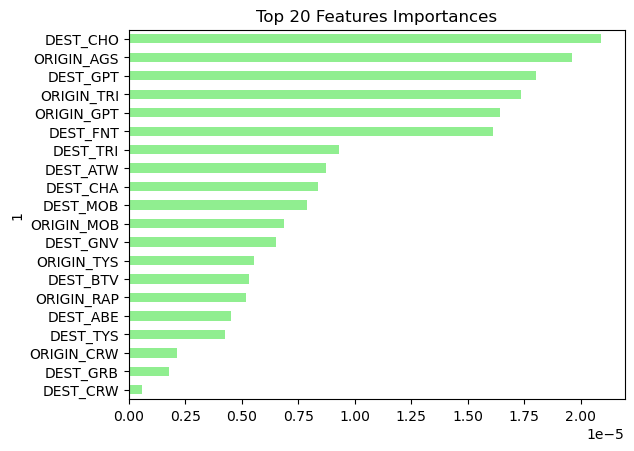

In [115]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
top_features = importances_sorted.head(20)
top_features.plot(kind='barh', color='lightgreen', title= 'Top 20 Features Importances', legend=False)